# Clustering jerárquico y dendrogramas
Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos 
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [2]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

## Generar datos aleatorios

(150, 2)


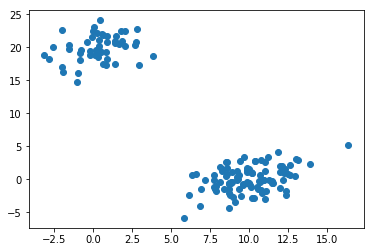

In [3]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = 100) #(vector de medias, matriz de var y cov,tamaño de la muestra)
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = 50)
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
X

array([[ 9.21188389e+00, -1.51885892e-01],
       [ 8.88937431e+00, -3.39374638e-01],
       [ 1.07684006e+01,  2.95244645e+00],
       [ 8.24213268e+00,  1.29094802e+00],
       [ 5.79670090e+00, -5.83776714e+00],
       [ 6.34993090e+00,  6.39595151e-01],
       [ 8.10571230e+00, -4.58872773e-01],
       [ 8.72084884e+00, -4.40444487e+00],
       [ 8.83500513e+00, -3.91661101e-01],
       [ 1.04006121e+01,  2.71240817e+00],
       [ 1.19550340e+01,  1.98602715e+00],
       [ 8.50141850e+00,  5.03495832e-01],
       [ 9.23359190e+00,  1.30693205e+00],
       [ 1.22776800e+01,  1.62763958e+00],
       [ 1.09590184e+01, -1.27520318e-01],
       [ 8.72437412e+00, -7.31019114e-01],
       [ 9.64949127e+00,  3.41989410e+00],
       [ 1.14991208e+01, -5.51131721e-01],
       [ 1.14825643e+01, -2.86234942e-01],
       [ 8.58740424e+00,  1.66814229e+00],
       [ 1.19557043e+01, -1.27350693e+00],
       [ 9.85622312e+00,  1.08989137e+00],
       [ 1.01183101e+01,  1.08458295e+00],
       [ 7.

## Clustering Jerárquico

In [5]:
Z = linkage(X, "ward") #Matriz de enlaces:[dataset, distancia entre clusters]
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

### Explorar enlaces

In [6]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [7]:
c, coph_dist = cophenet(Z, pdist(X)) #cophenet(matriz de enlaces, matriz de distancias de X)
c #El coeficiente de correlacion de Cophenet indica qué tanto la clusterizacion preserva las distancias entre individuos.
#La formula del coeficiente es una correlacion entre las distancias entre clusters y las distancias entre individuos
#Se busca cercano a 1

0.9800148387574268

In [8]:
Z.shape

(149, 4)

In [9]:
Z[0] #Primer enlace o cluster 150

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

In [10]:
Z[1] #Segundo enlace o cluster 151

array([1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00])

In [11]:
Z[:20] #20 primeros enlaces

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [12]:
#Miramos el primer enlace de 3 individuos: es el formado por el individuo 62 y el cluster 152
print(Z[152-len(X)])# cluster 152 formado por individuos 33 y 68

[33.         68.          0.07106779  2.        ]


In [13]:
X[[33,62,68]] #Los individuos 33, 68 y 62 deben parecerse

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

In [14]:
#Miramos el segundo enlace con 3 individuos: es el formado por el individuo 41 y el cluster 158
print(Z[158-len(X)])# cluster 158 formado por individuos 15 y 69

[15.         69.          0.11428971  2.        ]


In [15]:
X[[41,15,69]]

array([[ 8.81582877, -0.56394025],
       [ 8.72437412, -0.73101911],
       [ 8.69529949, -0.62048946]])

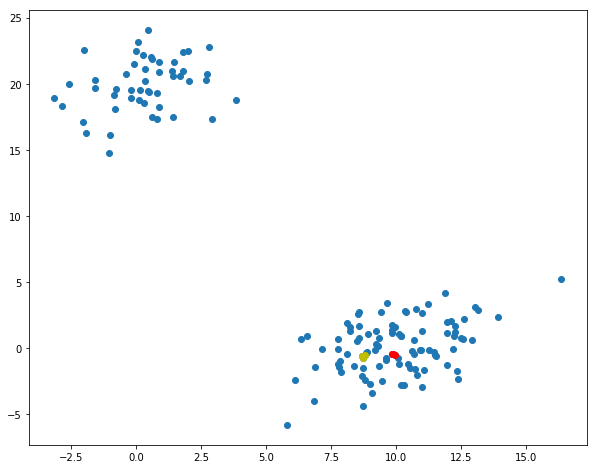

In [16]:
idx = [33,62,68] #primer enlace de 3 individuos
idx2 = [15,69,41] #segundo enlace de 3 individuos
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1]) #Graficar todos los puntos del dataset
plt.scatter(X[idx,0], X[idx,1], c='r') #destacamos en rojo los puntos 33, 62, y 68
plt.scatter(X[idx2,0], X[idx2,1], c='y') #destacamos en amarillo los puntos 15, 69 y 41
plt.show()

### Representación gráfica de un dendrograma

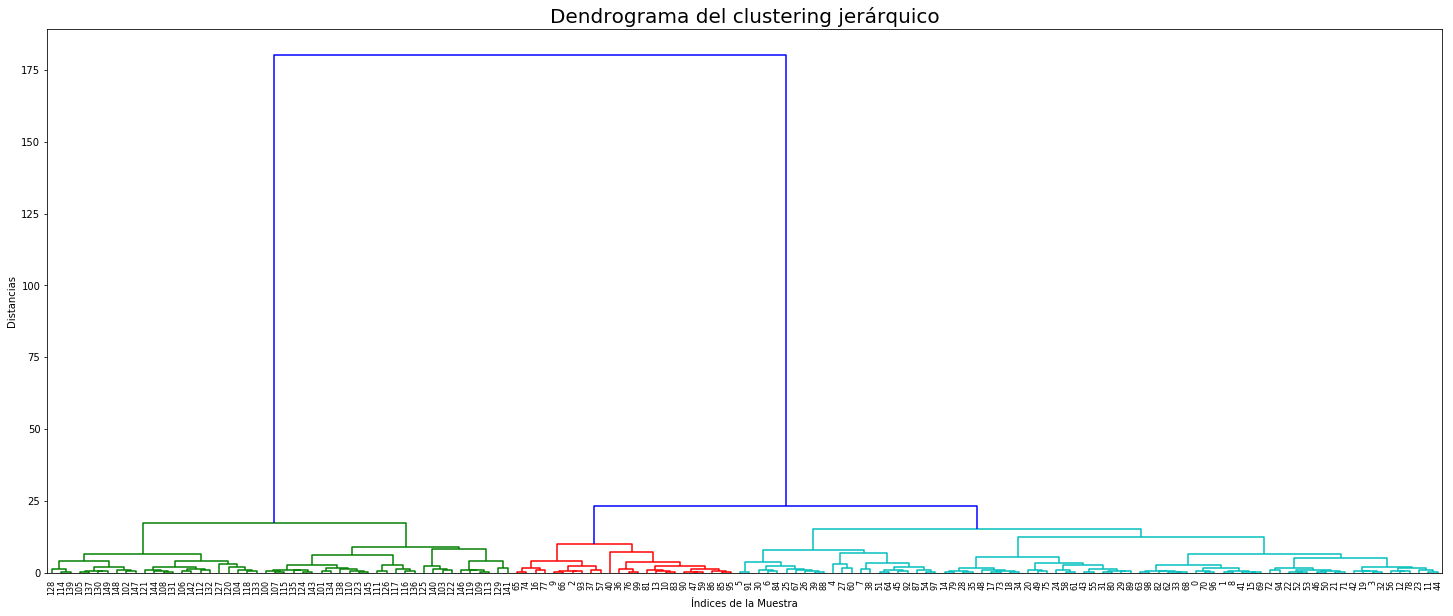

In [46]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico",fontsize=20)
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=20) #color_treshold=0.7*altura total
plt.show()

In [44]:
Z[-4:,] #ultimos 4 enlaces

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendrograma
Version reducida del dendrograma

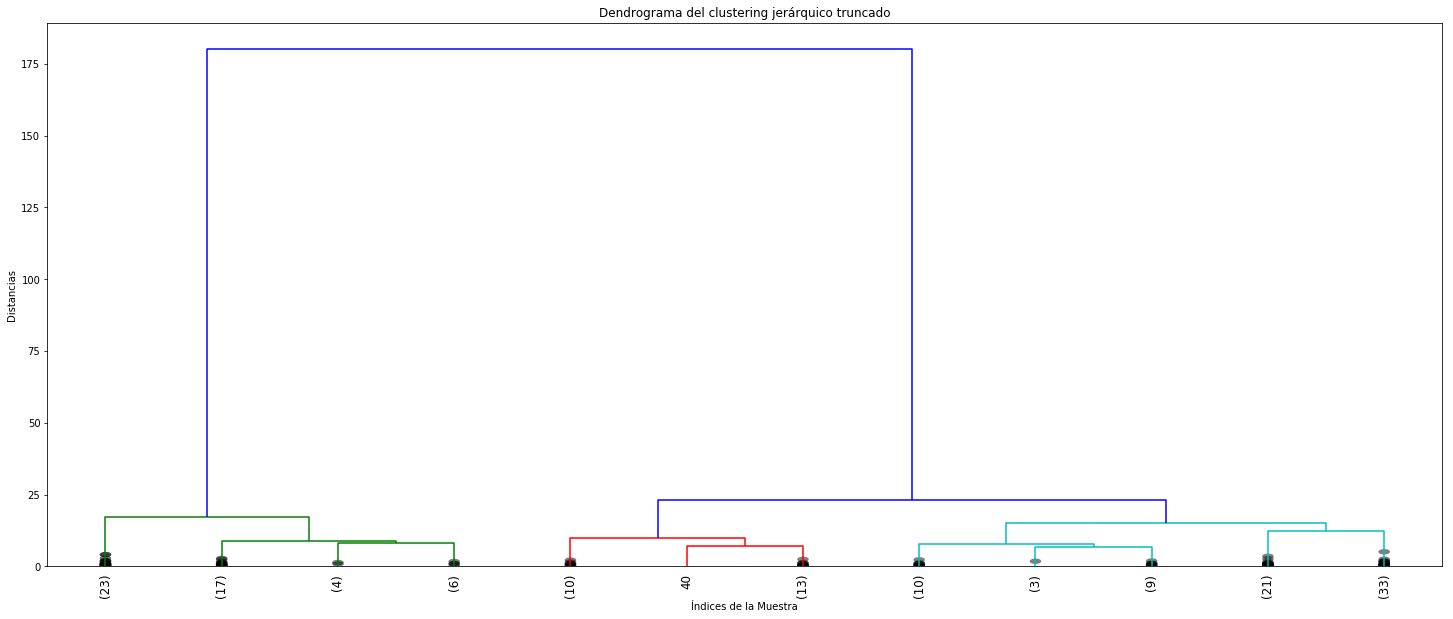

In [19]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")

dendrogram(Z, leaf_rotation=90., leaf_font_size=12.0, color_threshold=20,
           truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True,)
# truncate_mode=solo muestra los ultimos p clusters
# p =numero de clusters que desea ver, show_leaf_counts=ver cuanto elementos conforman cada cluster
# show_contracted=muestra un icono negro al final de cada rama, en vez de todos los elementos, con la altura de la distancia
# mas grande

plt.show()

### Dendrograma personalizado

In [20]:
#Hago mi propia funcion para mostrar un dendrograma con etiquetas en cada nodo donde se unen los clusters
def dendrogram_tune(*args, **kwargs):
    
# *args indica que recibe cualquier numero de parámetros ordenados y los almacena en una tupla
# **kwargs indica que recibe cualquier numero de parámetros desordenados, para identificarlos se tienen que pasar con su nombre,
#   y los almacena en un diccionario
    
    max_d=kwargs.pop("max_d", None) # Borra el elemento llamado "max_d" del diccionario kwargs, 
                                    # si carece de valor se le asigna None, y por último regresa el valor borrado.
    if max_d and 'color_threshold' not in kwargs:  #SI EXISTE max_d Y NO HAY 'color_threshold' en kwargs
        kwargs['color_threshold'] = max_d          #Asignar el valore de max_d a 'color_threshold'
    
    annotate_above = kwargs.pop('annotate_above', 0)  # Borra el elemento llamado "annotate_above" del diccionario kwargs, 
                                           # y si carece de valor se le asigna 0, y por último se regresa el valor borrado.
    
    ddata = dendrogram(*args,**kwargs)  #Se hace uso de la funcion dendrogram que devuelve un diccionario
        
    if not kwargs.get('no_plot', False):   #SI no se pasó el parámetro 'no_plot' a kwargs entonces:
        
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above: #annotate_above indica a partir de qué altura quieres mostrar las etiquetas
                plt.plot(x,y,'o',c=c) # color =c indica que use el mismo color que tienen las uniones
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata

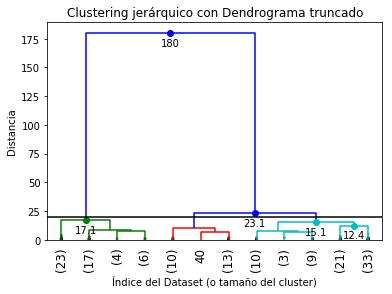

In [21]:
dendrogram_tune(Z,truncate_mode='lastp',p=12, leaf_rotation=90., leaf_font_size=12.,
                show_contracted=True, max_d=20,annotate_above=10)  #max_d muestra el corte a altura 20
plt.show()

### Corte automático del dendrograma
Usaremos el método de la **inconsistencia**, que es el método predeterminado que usa python para determinar el numero optimo de clusters. Fórmula:


inconsistency_i = (h_i-avg(h_j))/std(h_j)  

In [22]:
from scipy.cluster.hierarchy import inconsistent #Importo la funcion del coeficiente de inconsistencia

In [23]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]
#primera columna:promedio: desviacion estandar; numero de elementos del cluster;factor de inconsistencia para cad a union

array([[ 3.63777835,  2.5556114 ,  4.        ,  1.35908084],
       [ 3.89767268,  2.57216151,  7.        ,  1.54388156],
       [ 3.05885714,  2.66707272,  6.        ,  1.87115096],
       [ 4.92746418,  2.73259589,  7.        ,  1.39821573],
       [ 4.76943311,  3.16276553,  6.        ,  1.60455941],
       [ 5.27287862,  3.56604844,  7.        ,  2.00627335],
       [ 8.22057081,  4.07583053,  7.        ,  1.69162096],
       [ 7.83287032,  4.46681266,  7.        ,  2.07808207],
       [11.38091435,  6.29430022,  7.        ,  1.86535033],
       [37.25844589, 63.31539362,  7.        ,  2.25872377]])

### Método del codo


últimas 10 alturas [180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


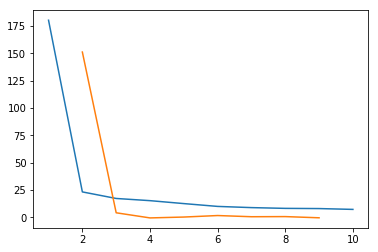

El número óptimo de cluster es 2


In [25]:
last = Z[-10:,2] #Las alturas de los últimos 10 enlaces
last_rev = last[::-1] #voltea el arreglo del ultimo al primero elementos
print("últimas 10 alturas",last_rev)
eje_x = np.arange(1, len(last)+1) #crea arreglo de numeros consecutivos del 1 al 10
plt.plot(eje_x, last_rev)

acc = np.diff(last,2) #Calcula la resta entre los elementos de dos en dos 2 veces
acc_rev = acc[::-1]   #invierte el orden del arreglo de las diferencias dobles
plt.plot(eje_x[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2 #Posicion del valor mas grande en el arreglo y luego sumar 2 para que esté en el mismo orden de las diferencias a las que corresponden
print("El número óptimo de cluster es %s"%str(k))


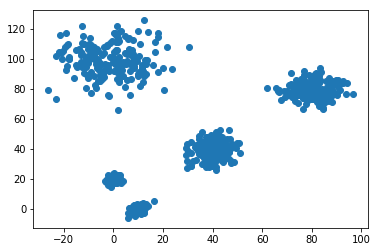

In [26]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [27]:
Z2 = linkage(X2,"ward")

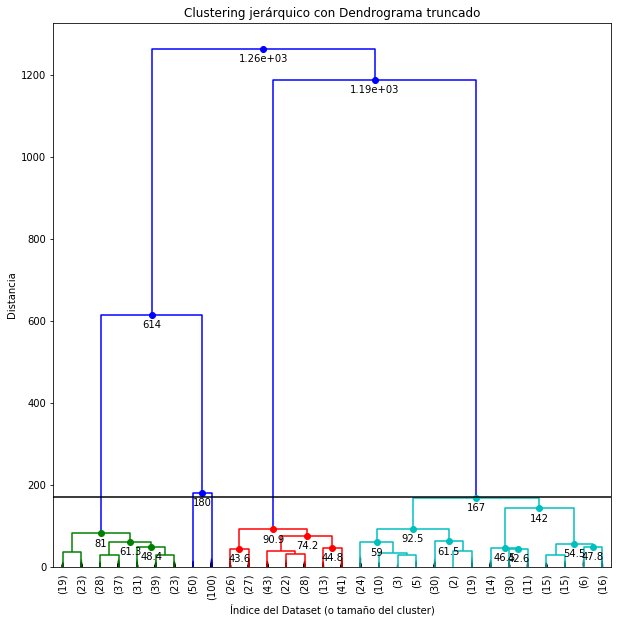

In [28]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above = 40,
    max_d = 170
)

plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


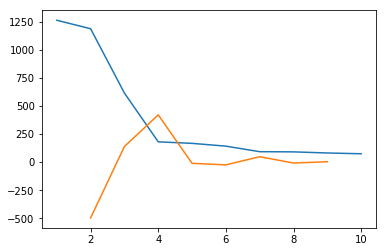

El número óptimo de cluster es 4


In [29]:
last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [30]:
print(inconsistent(Z2, 5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


## Recuperar los clusters y sus elementos

In [31]:
from scipy.cluster.hierarchy import fcluster

In [49]:
max_d=25
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [50]:
k=2
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [51]:
fcluster(Z, 8, depth=10)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

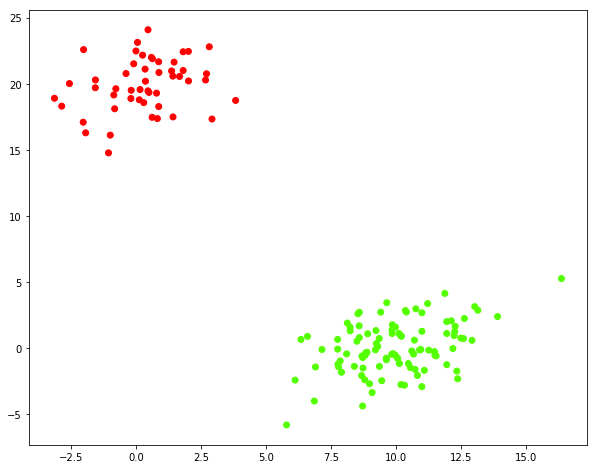

In [52]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap="prism")
plt.show()

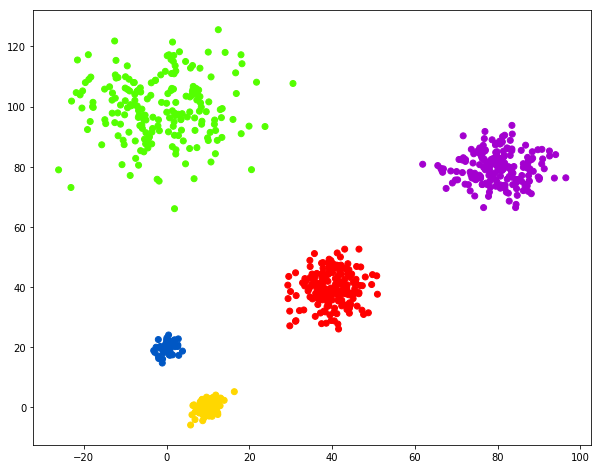

In [54]:
max_d=170
clusters = fcluster(Z2, max_d, criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1], c = clusters, cmap="prism")
plt.show()